# Cvičení 01 - Úvod do práce s daty

## Popis základních balíčků

### NumPy 
  * Balíček pro rychlé „vědecké“ výpočty (zejména lineární algebra a náhodná čísla).
  * Většinou se jedná jen o interface k vysoce optimalizovaným C/C++/Fortran knihovnám.
  * http://www.numpy.org/

### pandas
  * Oblíbený nástroj pro datovou analýzu.
  * Pomáhá usnadnit práci s tabulkovými daty.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Soubor nástrojů datové vědy psaný v Pythonu.
  * Staví na NumPy, [SciPy](https://www.scipy.org/) a matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Základní knihovna pro vykreslování grafů.
  * https://matplotlib.org/

### seaborn
  * Nástroj pro vizualizaci dat, založený na matplotlib.
  * https://seaborn.pydata.org/

In [1]:
import pandas as pd
import numpy as np

## Explorace a validace dat, čištění v Pandas
V následující části budeme pracovat s kouskem dat z datasetu [titanic](https://www.kaggle.com/c/titanic/data) z platformy  [Kaggle](https://www.kaggle.com/). Obecně se tento dataset věnuje klasifikační úloze přežití pasažérů Titaniku.

### Načítání dat
- Načítání dat z csv souborů do pandas typu DataFrame.
- Zkratka CSV znamená **comma** separated values.
    - Co asi může znamenat TSV/SSV? Jak je otevřít? 

In [2]:
# Načtěte data z CSV souboru data1.csv
df = pd.read_csv("data1.csv")

### Základní informace o datasetu

In [3]:
# Zobrazit prvních/posledních k hodnot
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data načtená pomocí Pandas tedy vypadají takto: 

![img/dataframe.png](img/dataframe.png)
*zdroj obrázku: [https://www.geeksforgeeks.org/creating-a-pandas-dataframe/](https://www.geeksforgeeks.org/creating-a-pandas-dataframe/)*

In [4]:
# Základní informace o dataframu (typy sloupců, počty hodnot)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  759 non-null    int64  
 1   Survived     759 non-null    int64  
 2   Pclass       759 non-null    int64  
 3   Name         759 non-null    object 
 4   Sex          759 non-null    object 
 5   Age          606 non-null    float64
 6   SibSp        759 non-null    int64  
 7   Parch        759 non-null    int64  
 8   Ticket       759 non-null    object 
 9   Fare         759 non-null    float64
 10  Cabin        175 non-null    object 
 11  Embarked     758 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.3+ KB


In [5]:
# Získat základní statistiky o datech (count, mean, std, min, max,..)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,759.000000,759.000000,759.000000,606.000000,759.000000,759.000000,759.000000
mean,380.000000,0.388669,2.299078,29.896733,0.520422,0.375494,33.248341
std,219.248717,0.487769,0.835484,14.553021,1.043534,0.804001,52.110573
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,190.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,380.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,569.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,759.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Základy přístupu k datům 
Základní objekt v Pandas je `pd.Series`. `pd.DataFrame` je v podstatě kontejner na několik `pd.Series`.
- Všechny pandas objekty jsou 'value-mutable' ale ne vždy 'size-mutable'
    - length of a Series cannot be changed
    - but columns can be inserted into a DataFrame
- DataFrame obsahuje popsané osy (index řádku / název sloupce)

In [6]:
# Názvy sloupců v DataFrame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Názvy řádků v DataFrame
df.index

RangeIndex(start=0, stop=759, step=1)

#### Přístup ke sloupcům v DataFrame
- Přístup možný 2 způsoby:
    - `df["Age"]`
    - `df.Age`
- Po výběru jednoho sloupce již pracujeme s `pd.Series`!
- Pro tvorbu nového sloupce je nutné použít hranaté závorky
- Attribute access občas nejde použít (speciální název sloupce, mezery,..)

In [8]:
df.Age

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
754    48.00
755     0.67
756    28.00
757    18.00
758    34.00
Name: Age, Length: 759, dtype: float64

In [9]:
# Vybereme sloupec Age (výsledkem je Series). Na ní vybereme prvních 10 hodnot.
df.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
# Vybereme sloupce "Age" a "Sex". Výsledkem je DataFrame!
df[["Age", "Sex"]]

,Age,Sex
0,22.00,male
1,38.00,female
2,26.00,female
3,35.00,female
4,35.00,male
...,...,...
754,48.00,female
755,0.67,male
756,28.00,male
757,18.00,male


In [11]:
# Jak vybrat 3 a 4 řádek dataframe?
df.iloc[3:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Filtrování dat
- Data filtrujeme aplikací listu booleans na Series/DataFrame
- Na sloupce můžeme využívat booleovské operátory

In [12]:
# Kolik lidí bylo starších 30 let?
(df['Age'] > 30).sum()

257

In [13]:
# Kdo bydlel v kabině D33?
#df['Cabin'] == 'D33'
df[df['Cabin'] == 'D33']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C


In [14]:
# Jak nalézt všechny jejichž jméno začíná na Goodwin?
df[df.Name.str.startswith('Goodwin')]
#df[df.Name.startswith('Goodwin')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


### Jak detekovat chybějící hodnoty v datasetu?
Data občas mohou v datasetu chybět. Jak je můžeme najít?

By-default považuje Pandas za chybějící hodnoty `None` nebo `numpy.NaN`. Ne tedy prázdný string `''` nebo `np.inf`.

In [15]:
# Vybereme pouze řádky (ne)obsahující missing values
# # df.isnull() == df.notna()
# df.isnull() == df.isna()
df.isnull()# == 
#df.isna()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
754,False,False,False,False,False,False,False,False,False,False,True,False
755,False,False,False,False,False,False,False,False,False,False,True,False
756,False,False,False,False,False,False,False,False,False,False,True,False
757,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
# Doplníme chybějící hodnotu u Cabin na text "unknown"
df.Cabin = df.Cabin.fillna('unknown')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65.0000,unknown,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,unknown,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.00,0,0,350042,7.7958,unknown,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.00,0,0,29108,11.5000,unknown,S


## Úloha 01: Zřetězení dat

  - Připojte data2.csv za data1.csv následujícím způsobem:
      - Data (sloupce), která nejsou v data1.csv jsou v data2.csv vynechána.
      - Spočítejte věk pomocí sloupce BirthYear (rok narození) v data2.csv a uložte jej do sloupce Age. Rok potopení Titaniku byl 1912.
      - PasangerId zkusíme nastavit jako nový index. Pokud to nejde, identifikujeme proč, navrhneme opravu a poté to zkusíme znovu. 

In [17]:
# Načteme soubor data2.csv a zkontrolujeme, že sedí názvy sloupců a zbytečné odstraníme
df2 = pd.read_csv("data2.csv", sep=";")

# podívejme se na dataset
df2.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,BirthYear,FootSize,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,1879.0,31,0,0,110152,86.5000,B77,S
1,1,2,0,3,"Garfirth, Mr. John",male,NaN,39,0,0,358585,14.5000,NaN,S
2,2,3,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,1871.0,35,0,0,SOTON/O2 3101272,7125.0000,NaN,S
3,3,4,1,3,"Barah, Mr. Hanna Assi",male,1892.0,54,0,0,2663,7.2292,NaN,C
4,4,5,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,1876.0,18,1,2,113760,120.0000,B96 B98,S


In [18]:
# sloupce, které jsou v df2 a nejsou v df
list(set(df2.columns) - set(df.columns))

['BirthYear', 'Unnamed: 0', 'FootSize']

In [19]:
# V nově načteném df spočítáme věk cestujících
df2["Age"] = 1912-df2["BirthYear"]
df2

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,BirthYear,FootSize,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,0,1,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,1879.0,31,0,0,110152,86.5000,B77,S,33.0
1,1,2,0,3,"Garfirth, Mr. John",male,NaN,39,0,0,358585,14.5000,NaN,S,NaN
2,2,3,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,1871.0,35,0,0,SOTON/O2 3101272,7125.0000,NaN,S,41.0
3,3,4,1,3,"Barah, Mr. Hanna Assi",male,1892.0,54,0,0,2663,7.2292,NaN,C,20.0
4,4,5,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,1876.0,18,1,2,113760,120.0000,B96 B98,S,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,128,0,2,"Montvila, Rev. Juozas",male,1885.0,18,0,0,211536,13.0000,NaN,S,27.0
128,128,129,1,1,"Graham, Miss. Margaret Edith",female,1893.0,22,0,0,112053,30.0000,B42,S,19.0
129,129,130,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,24,1,2,W./C. 6607,23.4500,NaN,S,NaN
130,130,131,1,1,"Behr, Mr. Karl Howell",male,1886.0,18,0,0,111369,30.0000,C148,C,26.0


In [20]:
# Odstraníme zbytečné sloupce
df2 = df2.drop(columns = list(set(df2.columns) - set(df.columns)))
df2

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,0,0,110152,86.5000,B77,S,33.0
1,2,0,3,"Garfirth, Mr. John",male,0,0,358585,14.5000,NaN,S,NaN
2,3,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,0,0,SOTON/O2 3101272,7125.0000,NaN,S,41.0
3,4,1,3,"Barah, Mr. Hanna Assi",male,0,0,2663,7.2292,NaN,C,20.0
4,5,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,1,2,113760,120.0000,B96 B98,S,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.0
128,129,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.0
129,130,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,NaN
130,131,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.0


In [21]:
# Spojíme soubory data1.csv a data2.csv (existuje více způsobů). Všimněte si, že index nyní neodpovídá!
# df.append je vpodstatě ekvivalent pd.concat((df, df2), axis=0, join='outer')
dfn = df.append(df2)
#pd.concat((df, df2), axis=0, join='outer')

/tmp/ipykernel_13084/996580080.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn = df.append(df2)


In [22]:
# prohlédneme si výsledek
dfn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
128,129,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
129,130,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
130,131,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
# Zkusíme nastavit sloupec PassengerID jako nový index
dfn = dfn.set_index("PassengerId", drop=True, verify_integrity=True)

ValueError: Index has duplicate keys: Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            123, 124, 125, 126, 127, 128, 129, 130, 131, 132],
           dtype='int64', name='PassengerId', length=132)

In [25]:
# Vidíme, že obsahuje neunikátní hodnoty!
dfn.duplicated(['PassengerId']).sum()

132

In [26]:
# vhodným způsobem upravíme PassengerId v df2
df2["PassengerId"] += 1000
df2

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1001,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,0,0,110152,86.5000,B77,S,33.0
1,1002,0,3,"Garfirth, Mr. John",male,0,0,358585,14.5000,NaN,S,NaN
2,1003,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,0,0,SOTON/O2 3101272,7125.0000,NaN,S,41.0
3,1004,1,3,"Barah, Mr. Hanna Assi",male,0,0,2663,7.2292,NaN,C,20.0
4,1005,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,1,2,113760,120.0000,B96 B98,S,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,1128,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.0
128,1129,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.0
129,1130,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,NaN
130,1131,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.0


In [27]:
dfn = df.append(df2)
dfn.duplicated(['PassengerId']).sum()

/tmp/ipykernel_13084/2787836355.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn = df.append(df2)


0

In [28]:
dfn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
127,1128,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
128,1129,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
129,1130,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
130,1131,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
# Nastavíme sloupec PassengerID jako nový index
dfn = dfn.set_index("PassengerId", drop=True, verify_integrity=True)

In [30]:
dfn

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
1128,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
1129,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
1130,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Vizualizace pomocí pandas a seaborn

Zde si ukážeme pouze minimální základ. Více se dozvíte v předmětu BI-VIZ!

In [1]:
import matplotlib.pyplot as plt

# Bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 

In [32]:
# Matplotlib umožňuje změnit styl na jiný, než defaultní
# import matplotlib
# matplotlib.style.use('ggplot')

### Základní chování grafů

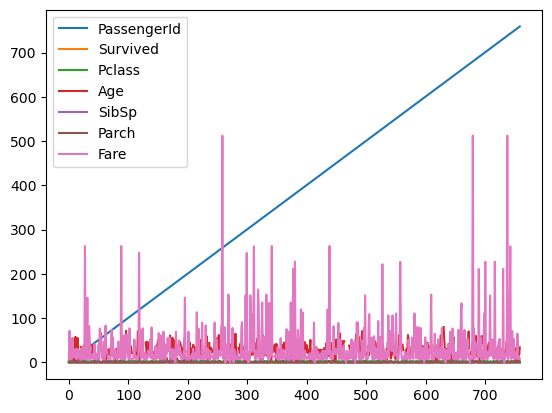

In [33]:
# Co se stane když pustíme graf bez žádných parametrů?
df.plot()
plt.show()

### Běžně používané typy grafů
* Ukážeme si běžně používané typy grafů na věku pasažérů

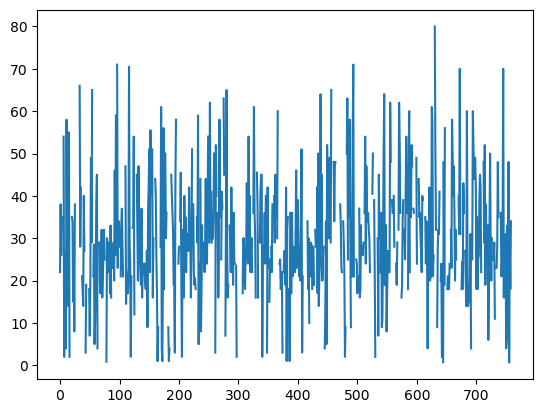

In [34]:
# Line chart
df.Age.plot()
plt.show()

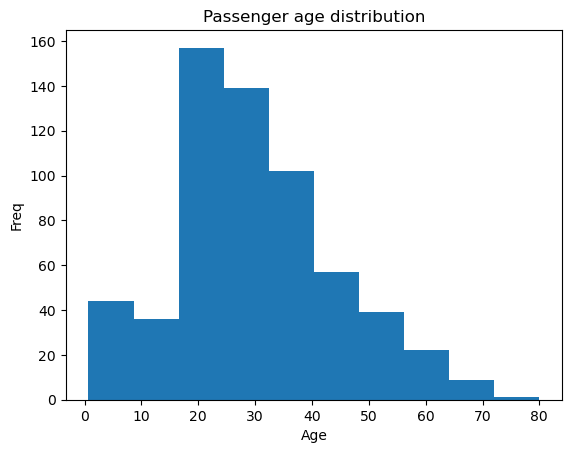

In [35]:
# Histogram. Správný graf pro tento usecase.
df.Age.plot(kind='hist', title="Passenger age distribution")
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

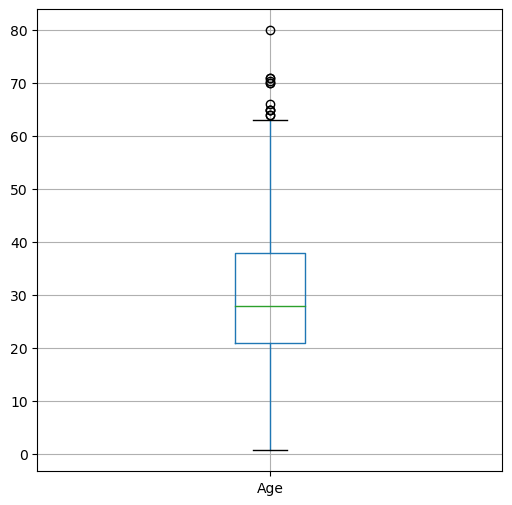

In [36]:
# Boxplot je taktéž vynikající graf
plt.figure(figsize=(6,6))
df.boxplot(column=['Age'])
plt.show()

### Zobrazování subgrafů

* Co když chceme mí více grafů vedle sebe nebo i pod sebou?
* Dvě hlavní možnosti
    1. Metoda `plt.subplot`
    2. Metoda `plt.subplots`

In [37]:
survived = df[df["Survived"] == 1]
not_survived = df[df["Survived"] == 0]

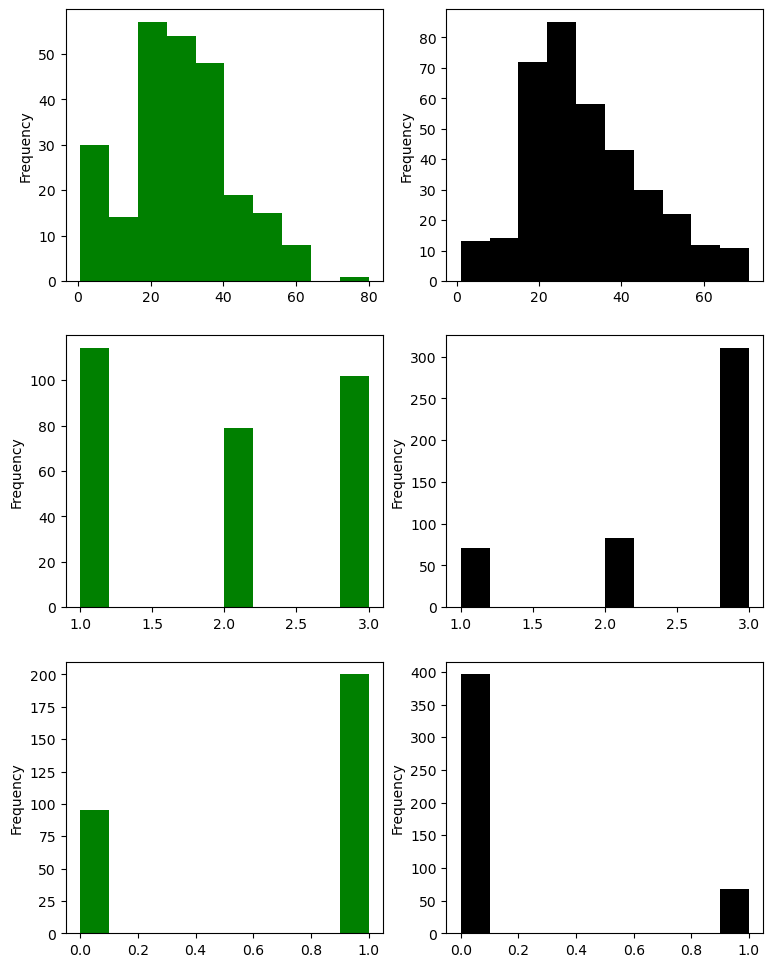

In [38]:
# Nastavíme velikost grafu (příliš malý graf je nečitelný)
plt.figure(figsize=(9,12)) # velikost figsize se určuje v palcích (angl. inches)


# První použijeme metodu plt.subplot
plt.subplot(321) # tři řádky a dva sloupce, přiřaď následující graf do prvního slotu
survived['Age'].plot.hist(color='Green')
plt.subplot(322)
not_survived['Age'].plot.hist(color='Black')
plt.subplot(323)
survived['Pclass'].plot.hist(color='Green')
plt.subplot(324)
not_survived['Pclass'].plot.hist(color='Black')
plt.subplot(325)
survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green')
plt.subplot(326)
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black')

plt.show()

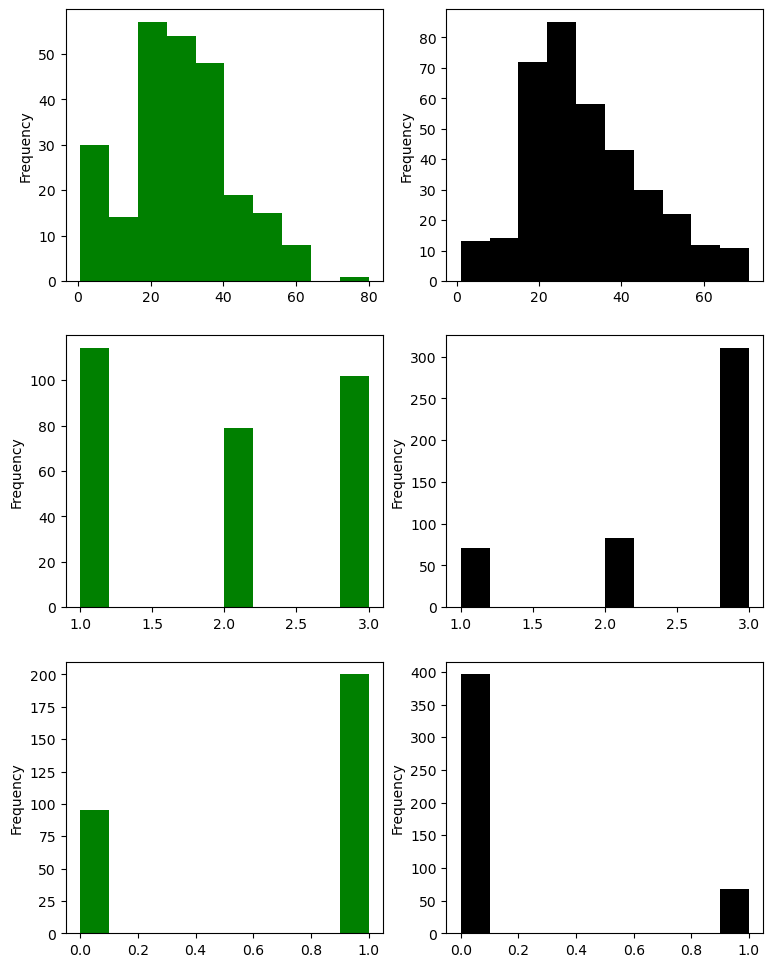

In [39]:
# Druhá možnost je metoda plt.subplots
fig, ax = plt.subplots(3, 2, figsize=(9,12))

survived['Age'].plot.hist(color='Green', ax=ax[0,0])
not_survived['Age'].plot.hist(color='Black', ax=ax[0,1])

survived['Pclass'].plot.hist(color='Green', ax=ax[1,0])
not_survived['Pclass'].plot.hist(color='Black', ax=ax[1,1])

survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green', ax=ax[2,0])
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black', ax=ax[2,1])

plt.show()

## Seaborne
* Využívá matplotlib
* Lze v ní snadno vytvořit grafy, které není snadné v matplotlibu napsat rychle
### Jak zjistit jaké mají příznaky vztahy mezi sebou?
* Chceme zjistit jak moc navzájem korelují jednotlivé příznaky
* Ideální graf na toto je heatmapa korelační matice

In [40]:
import seaborn as sns

In [41]:
# Heatmapa umí pracovat jen s číselnými hodnotami, je tedy nutné převést text na číselnou hodnotu
df.Sex = df.Sex.replace({"male": 0, "female": 1})

In [42]:
# Vytvoříme korelační matici
cor_matrix = df.corr()
cor_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.012250,-0.070609,-0.057989,0.078046,-0.089675,-0.020140,0.058774
Survived,0.012250,1.000000,-0.324464,0.541995,-0.089012,-0.024686,0.068052,0.245208
Pclass,-0.070609,-0.324464,1.000000,-0.106160,-0.366248,0.076966,0.015246,-0.556179
Sex,-0.057989,0.541995,-0.106160,1.000000,-0.139110,0.107131,0.238001,0.163787
Age,0.078046,-0.089012,-0.366248,-0.139110,1.000000,-0.311522,-0.193762,0.080193
SibSp,-0.089675,-0.024686,0.076966,0.107131,-0.311522,1.000000,0.403608,0.148126
Parch,-0.020140,0.068052,0.015246,0.238001,-0.193762,0.403608,1.000000,0.207941
Fare,0.058774,0.245208,-0.556179,0.163787,0.080193,0.148126,0.207941,1.000000


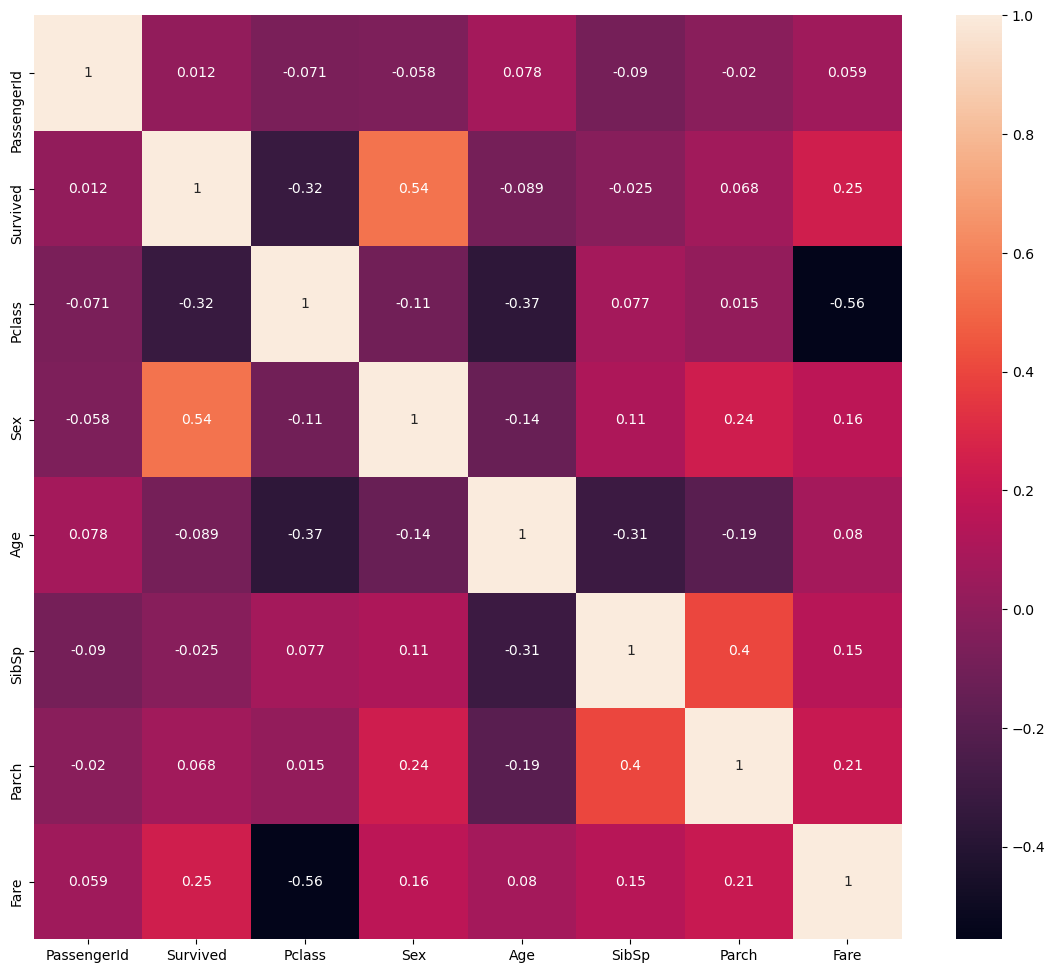

In [43]:
import seaborn as sns

plt.figure(figsize=(14,12))

# Zobrazení heatmapy
sns.heatmap(cor_matrix, annot=True)
plt.show()

## Stahování dat z webu pomocí Pythonu a pandas (1. úkol)
          
### Tipy pro scrapping s Pythonem:
   - K získání HTML zdrojáku stránky s `url` použijte `import requests`: 
      - `r = requests.get(url)`
      - `html = r.text`
   - Metoda `pandas.read_html(r.text)` uloží všechny tabulky `<table>` jako seznam pandas DataFrames:
      - `list_of_data_frames = pd.read_html(html,flavor='html5lib')`
   - Pro HTML parsování lze použít `from bs4 import BeautifulSoup`.

In [44]:
import requests

In [45]:
# příklad pro statutární město hl.m. Praha, výsledky voleb pro rok 2018
url = 'https://www.volby.cz/pls/kv2018/kv1111?xjazyk=CZ&xid=1&xdz=4&xnumnuts=1100&xobec=554782&xstat=0&xvyber=0'
dfs = pd.read_html(url,flavor='html5lib', decimal = ",", thousands = ".")

In [55]:
# podívejme se na data ve druhé tabulce
dfs[1]

Kandidátní listina                                      Hlasy         \
                číslo                           název       abs.    v %   
0                   1                        Patrioti    118 985   0.47   
1                   2                Otevřená radnice     12 373   0.05   
2                   3  Společ.proti výst.v Prok.údolí    114 350   0.45   
3                   4        protiPIRÁTSKÁ kandidátka    117 075   0.46   
4                   5           S.O.S ZA PRÁVA ZVÍŘAT     20 688   0.08   
5                   6            Koalice STAN, TOP 09  4 127 063  16.29   
6                   7   Volte Pr.Blok www.cibulka.net      4 275   0.02   
7                   8  Komunistická str.Čech a Moravy    827 036   3.26   
8                   9  DOST JE DOST! Ob. za svá práva     26 102   0.10   
9                  10                            PLUS     19 293   0.08   
10                 11           Česká pirátská strana  4 326 041  17.07   
11                 12      JAUNER Československo 2018     12 063   0.05   
12                 13          KRÁSNÁ PRAHA - ODA, NK     64 401   0.25   
13                 14                         ROZUMNÍ     58 262   0.23   
14                 15                       NEZÁVISLÍ     34 911   0.14   
15                 16            STAROSTOVÉ PRO PRAHU    486 991   1.92   
16                 17    SPR-Republ.str.Čsl. M.Sládka      1 788   0.01   
17                 18                 Strana zelených    467 071   1.84   
18                 19  Svob.a př.dem.-T.Okamura (SPD)    895 859   3.54   
19                 20                      PRAHA SOBĚ  4 197 578  16.57   
20                 21    Česká str.sociálně demokrat.    727 826   2.87   
21                 22    Občanská demokratická strana  4 527 920  17.87   
22                 23      Romská demokratická strana      4 005   0.02   
23                 24           Strana soukromníků ČR     39 654   0.16   
24                 25                       Zemanovci     26 736   0.11   
25                 26   Dělnic.str.sociální spravedl.     20 717   0.08   
26                 27                        ANO 2011  3 893 968  15.37   
27                 28              PRO Zdraví a Sport     74 686   0.29   
28                 29      Evropská koalice pro Prahu     91 957   0.36   

   Početkandidátů Přepočtenýzákladdle počtukandidátů  \
   Početkandidátů Přepočtenýzákladdle počtukandidátů   
0              65                      25 339 674,00   
1              30                      11 695 234,15   
2              64                      24 949 832,86   
3              65                      25 339 674,00   
4               7                       2 728 887,96   
5              65                      25 339 674,00   
6               5                       1 949 205,69   
7              65                      25 339 674,00   
8              65                      25 339 674,00   
9              63                      24 559 991,72   
10             65                      25 339 674,00   
11             65                      25 339 674,00   
12             63                      24 559 991,72   
13             65                      25 339 674,00   
14             36                      14 034 280,98   
15             65                      25 339 674,00   
16              6                       2 339 046,83   
17             65                      25 339 674,00   
18             65                      25 339 674,00   
19             65                      25 339 674,00   
20             65                      25 339 674,00   
21             65                      25 339 674,00   
22              3                       1 169 523,41   
23             65                      25 339 674,00   
24             65                      25 339 674,00   
25             64                      24 949 832,86   
26             65                      25 339 674,00   
27             65                      25 339 674,00 

Vidíme, že jsou špatně načtené kódování a desetinná čísla. Je třeba nastavit parametry read_html.

In [47]:
# Opravené načtení
#dfs = 
dtab = dfs[1]
dtab

Kandidátní listina                                      Hlasy         \
                číslo                           název       abs.    v %   
0                   1                        Patrioti    118 985   0.47   
1                   2                Otevřená radnice     12 373   0.05   
2                   3  Společ.proti výst.v Prok.údolí    114 350   0.45   
3                   4        protiPIRÁTSKÁ kandidátka    117 075   0.46   
4                   5           S.O.S ZA PRÁVA ZVÍŘAT     20 688   0.08   
5                   6            Koalice STAN, TOP 09  4 127 063  16.29   
6                   7   Volte Pr.Blok www.cibulka.net      4 275   0.02   
7                   8  Komunistická str.Čech a Moravy    827 036   3.26   
8                   9  DOST JE DOST! Ob. za svá práva     26 102   0.10   
9                  10                            PLUS     19 293   0.08   
10                 11           Česká pirátská strana  4 326 041  17.07   
11                 12      JAUNER Československo 2018     12 063   0.05   
12                 13          KRÁSNÁ PRAHA - ODA, NK     64 401   0.25   
13                 14                         ROZUMNÍ     58 262   0.23   
14                 15                       NEZÁVISLÍ     34 911   0.14   
15                 16            STAROSTOVÉ PRO PRAHU    486 991   1.92   
16                 17    SPR-Republ.str.Čsl. M.Sládka      1 788   0.01   
17                 18                 Strana zelených    467 071   1.84   
18                 19  Svob.a př.dem.-T.Okamura (SPD)    895 859   3.54   
19                 20                      PRAHA SOBĚ  4 197 578  16.57   
20                 21    Česká str.sociálně demokrat.    727 826   2.87   
21                 22    Občanská demokratická strana  4 527 920  17.87   
22                 23      Romská demokratická strana      4 005   0.02   
23                 24           Strana soukromníků ČR     39 654   0.16   
24                 25                       Zemanovci     26 736   0.11   
25                 26   Dělnic.str.sociální spravedl.     20 717   0.08   
26                 27                        ANO 2011  3 893 968  15.37   
27                 28              PRO Zdraví a Sport     74 686   0.29   
28                 29      Evropská koalice pro Prahu     91 957   0.36   

   Početkandidátů Přepočtenýzákladdle počtukandidátů  \
   Početkandidátů Přepočtenýzákladdle počtukandidátů   
0              65                      25 339 674,00   
1              30                      11 695 234,15   
2              64                      24 949 832,86   
3              65                      25 339 674,00   
4               7                       2 728 887,96   
5              65                      25 339 674,00   
6               5                       1 949 205,69   
7              65                      25 339 674,00   
8              65                      25 339 674,00   
9              63                      24 559 991,72   
10             65                      25 339 674,00   
11             65                      25 339 674,00   
12             63                      24 559 991,72   
13             65                      25 339 674,00   
14             36                      14 034 280,98   
15             65                      25 339 674,00   
16              6                       2 339 046,83   
17             65                      25 339 674,00   
18             65                      25 339 674,00   
19             65                      25 339 674,00   
20             65                      25 339 674,00   
21             65                      25 339 674,00   
22              3                       1 169 523,41   
23             65                      25 339 674,00   
24             65                      25 339 674,00   
25             64                      24 949 832,86   
26             65                      25 339 674,00   
27             65                      25 339 674,00 

In [48]:
dtab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   (Kandidátní listina, číslo)                                               29 non-null     int64  
 1   (Kandidátní listina, název)                                               29 non-null     object 
 2   (Hlasy, abs.)                                                             29 non-null     object 
 3   (Hlasy, v %)                                                              29 non-null     float64
 4   (Početkandidátů, Početkandidátů)                                          29 non-null     int64  
 5   (Přepočtenýzákladdle počtukandidátů, Přepočtenýzákladdle počtukandidátů)  29 non-null     object 
 6   (Přepočtené %platných hlasů, Přepočtené %platných hlasů)             

In [49]:
dtab.iloc[:5,[0,1]]

Kandidátní listina                                
               číslo                           název
0                  1                        Patrioti
1                  2                Otevřená radnice
2                  3  Společ.proti výst.v Prok.údolí
3                  4        protiPIRÁTSKÁ kandidátka
4                  5           S.O.S ZA PRÁVA ZVÍŘAT

### Úloha 02: jednoduché stažení dat z webu pomocí POST formuláře.

Úkolem je stáhnout všechna data z http://kap.ujak.cz/index.php a uložit je ve formátu pandas DataFrame.

Chceme u každé práce znát autora, název práce, vedoucího, rok, typ práce a odkaz na práci.

#### První použijeme pd.read_html

In [50]:
# url s formulářem
url = 'https://kap.ujak.cz/index.php'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_all = pd.DataFrame()
for prace in ['BP', 'DP']:
    for i in range(4):
        data['prace'] = prace
        strana = 30*i
        r = requests.post(url, params={'strana':strana}, data=data)
        r.encoding='cp1250'
        ldf = pd.read_html(r.text,flavor='html5lib', header=0)
        df_ujak = ldf[0]
        if df_ujak.shape[0] > 0:
            if data_all.shape[0] == 0:
                data_all = df_ujak.copy()
            else:
                data_all = pd.concat([data_all,df_ujak], ignore_index=True)

In [51]:
data_all

,Autor,Název práce,Vedoucí,Rok,Typ práce
0,Abdrakhmanova Aizhan,Vliv médií na děti a mládež v Kazachstánu,"Svobodová Alena, Doc. PhDr.; CSc.",2017,BP
1,Abdullayev Timur,Inflation: Kazakhstani and global tendencies,"Vacenovský Michal, Ing.; LL.M.",2011,BP
2,Abdulnourová Monika,Výchova a vzdělávání žáků ve věku 6 - 15 let s...,"Klugerová Jarmila, PaedDr.; Ph.D.",2022,BP
3,Abdussattarov Nursultan,Payment system od Kazakhstan: modern condition...,"Vacenovský Michal, Ing.; LL.M.",2011,BP
4,Ábelová Šárka,Rovné příležitosti mužů a žen na trhu práce (Z...,"Vacínová Marie, PhDr.; CSc.",2007,BP
...,...,...,...,...,...
235,Aubrechtová Barbora,Mediální aféry versus Public relations,"Nezval Martin, Mgr.;",2014,DP
236,Aubrechtová Jana,Koučování - Koučování v profesní praxi,"Koťa Jaroslav, Doc. PhDr.;",2007,DP
237,Augustín Juraj,Sociálne problémy zamestnanych žien rodiny s m...,"Onderišinová Katarína, ;",2008,DP
238,Augustínová Marina,FAIR TRADE,"Kolek Jindřich, Ing.; Ph.D., MBA",2015,DP


#### K získání odkazů použijeme Beutiful soap 4
* Pokud se podíváme na původní stránku, můžeme si všimnout že název práce zároveň slouží jako odkaz na práci samotnou.
* Tento odkaz ale `pandas.read_html` nedokázalo extrahovat. 
* Zkusíme jej tedy extrahovat pomocí Beautiful Soup z bs4.

In [52]:
from bs4 import BeautifulSoup

In [57]:
# url s formulářem
url = 'https://kap.ujak.cz/index.php'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_app = pd.DataFrame(columns = ['Název práce', 'url', 'Typ práce'])

for prace in ['BP', 'DP']:
    for i in range(1):
        data['prace'] = prace
        strana = 30*i
        r = requests.post(url, params={'strana':strana}, data=data)
        r.encoding='cp1250'
        soup = BeautifulSoup(r.text, 'html.parser')
        df_app = pd.DataFrame(columns = ['Název práce', 'url', 'Typ práce'])
        for line in soup.table.find_all('tr'):
            df_app = df_app.copy(
                {"Název práce": line.find('a').get_text(),
                 "url": line.find('a').get('href'),
                 "Typ práce": prace},
            )#ignore_index = True)
            
        if data_app.shape[0] == 0:
            data_app = df_app.copy()
        else:
            data_app = pd.concat([data_app,df_app], ignore_index=True)

#### Zkuste připojit URL k seznamu prací data_all abyste dostali jednu tabulku

In [60]:
# Spojíme pomocí left join
final_ujak = pd.merge(data_all,data_app, on ["Název práce", "Typ práce"], how="left")
final_ujak

NameError: name 'on' is not defined

V dalším kroku bychom z URL mohli vyextrahovat například ID té práce.

#### Další možností je použít přímo knihovnu pro scrapování
* Ukážeme si knihovnu `scrapy`
* Ve složce je soubor s názvem `ujak_crawler.py`
    * Tento script stáhne data o pracích i s linky na ně
    * Bohužel se špatně pouští v Jupyter Notebooku a tak jí pustíme přes shell

In [61]:
!scrapy runspider crawler/ujak_crawler.py -o crawler/crawled_data.csv

/bin/bash: scrapy: command not found


### Pro zajímavost se můžeme podívat kolik prací se stejným názvem bylo na UJAK od roku 2000
* Tohoto se dá snadno docílit přes `groupby`

In [62]:
dataUJAK = pd.read_csv('crawler/ujak.csv', index_col=0)
dataUJAK

,Autor,Název práce,Vedoucí,Rok,Typ práce
0,Abdrakhmanova Aizhan,Vliv médií na děti a mládež v Kazachstánu,"Svobodová Alena, Doc. PhDr.; CSc.",2017,BP
1,Abdullayev Timur,Inflation: Kazakhstani and global tendencies,"Vacenovský Michal, Ing.; LL.M.",2011,BP
2,Abdussattarov Nursultan,Payment system od Kazakhstan: modern condition...,"Vacenovský Michal, Ing.; LL.M.",2011,BP
3,Ábelová Šárka,Rovné příležitosti mužů a žen na trhu práce (Z...,"Vacínová Marie, PhDr.; CSc.",2007,BP
4,Abrahámová Jaroslava,Nekalá soutěž v aplikační praxi soudů v ČR,"Rákosník Jakub, Doc. PhDr. JUDr; Ph.D.",2008,BP
...,...,...,...,...,...
30757,Žuchadarová Gabriela,Šikana,"Toman Jan, PaedDr.;",2010,DP
30758,Žuchadarová Gabriela,Školní neúspěch a rizikové chování žáků,"Toman Jan, PaedDr.;",2015,DP
30759,Žuravlovová Lenka,Univerzity tretieho veku,"Onderišinová Katarína, ;",2010,DP
30760,Žůrková Alice,Pobytová zařízení pro osoby s mentálním postiž...,"Mottlová Jana, PhDr.; Ph.D.",2014,DP


In [63]:
dataUJAK[dataUJAK['Rok'] > 2000].groupby(['Název práce']).size().sort_values(ascending=False)

Název práce
Mezilidské vztahy na pracovišti                                                     56
Vliv rodiny na zdravý duševní vývoj dítěte                                          51
Domácí násilí                                                                       33
Specifické poruchy učení                                                            32
Kvalita života seniorů                                                              31
                                                                                    ..
Motivace,hodnocení a odměňování zaměstnanců v Karlovarské krajské nemocnici a.s.     1
Motivace, řízení pracovního výkonu a odměňování pracovníků v organizaci              1
Motivace, pracovní spokojenost a stimulace pracovníků ve vybrané společnosti         1
Motivace, nástroj ke zvýšení výkonu práce                                            1
„Hvězdné války“ a jejich obraz v dobovém československém tisku                       1
Length: 26624, dtype: int64

In [64]:
!ls

01_tutorial_cs_full.ipynb      a.txt	data1.csv  img
01_tutorial_cs_template.ipynb  crawler	data2.csv
